In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [2]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3289 non-null   object 
 1   index                           3289 non-null   int64  
 2   period                          3289 non-null   int64  
 3   timestamp                       3289 non-null   object 
 4   minute                          3289 non-null   int64  
 5   second                          3289 non-null   int64  
 6   possession                      3289 non-null   int64  
 7   duration                        2457 non-null   float64
 8   match_id                        3289 non-null   int64  
 9   type_id                         3289 non-null   int64  
 10  type_name                       3289 non-null   object 
 11  possession_team_id              3289 non-null   int64  
 12  possession_team_name            32

In [3]:
team1, team2 = df.team_name.unique()
team1, team2

("England Women's", "Sweden Women's")

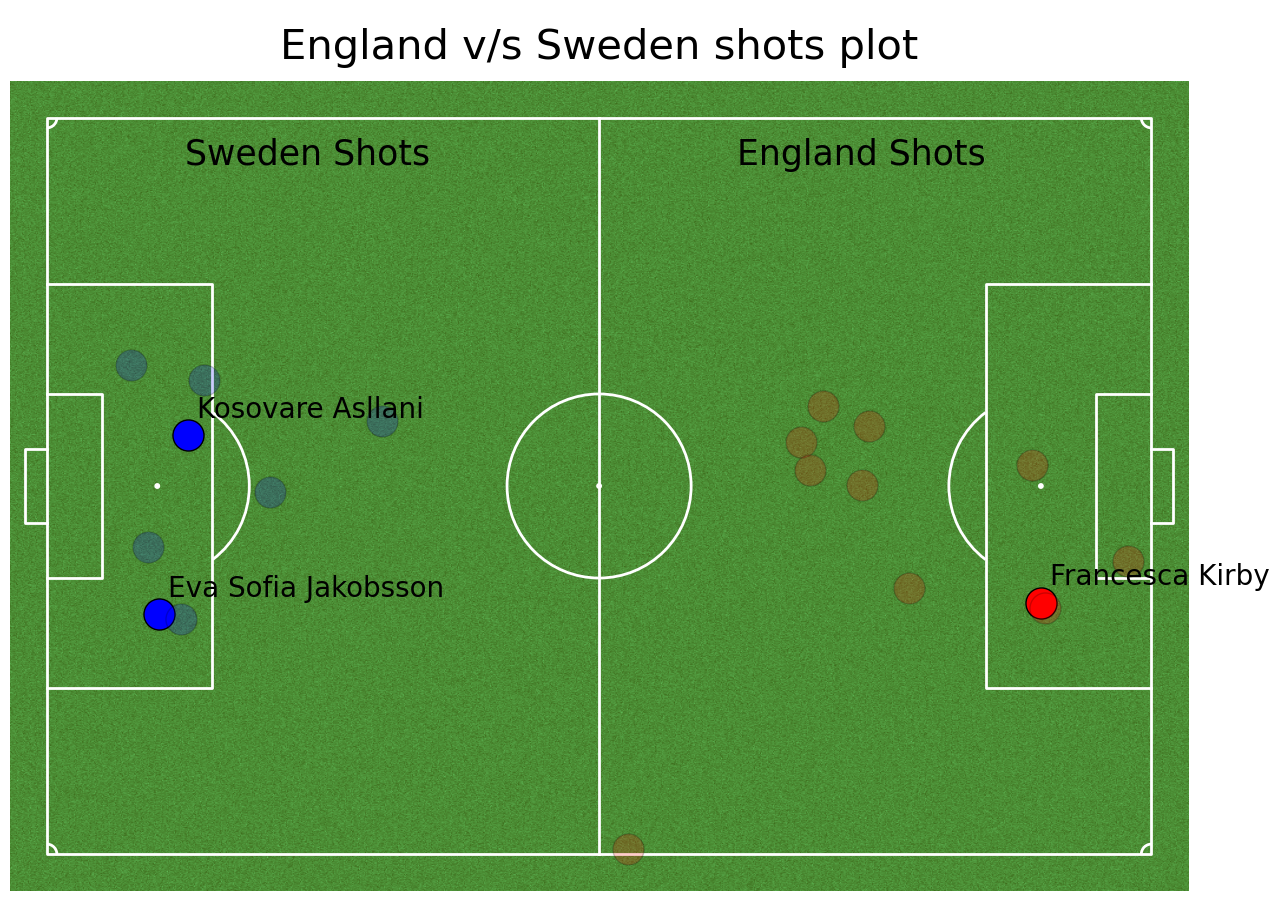

In [4]:
pitch = Pitch(pitch_type='statsbomb',corner_arcs=True, goal_type='box', pitch_color='grass', line_color='white')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.08, axis=False, endnote_height=0.02, title_space=0, endnote_space=0)
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', 'player_name']]
mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', 'player_name']]
for i, row in df_england.iterrows():
    if row.outcome_name == 'Goal':
        pitch.scatter(row.x, row.y, alpha=1, s=500, color='red', ax=ax['pitch'], edgecolors='black')
        pitch.annotate(row.player_name, (row.x+1, row.y-2), ax=ax['pitch'], fontsize=20)
    else:
        pitch.scatter(row.x, row.y, alpha=0.2, s=500, color='red', ax=ax['pitch'], edgecolors='black')
for i, row in df_sweden.iterrows():
    if row.outcome_name == 'Goal':
        pitch.scatter(120-row.x, 80-row.y, alpha=1, s=500, color='blue', ax=ax['pitch'], edgecolors='black')
        pitch.annotate(row.player_name, (120-row.x+1, 80-row.y-2), ax=ax['pitch'], fontsize=20)
    else:
        pitch.scatter(120-row.x, 80-row.y, alpha=0.2, s=500, color='blue', ax=ax['pitch'], edgecolors='black')
      

pitch.annotate('Sweden Shots', (15, 5), ax=ax['pitch'], fontsize=25)
pitch.annotate('England Shots', (75, 5), ax=ax['pitch'], fontsize=25)
fig.suptitle('England v/s Sweden shots plot', fontsize=30)
plt.show()